# Notizen

In [1]:
#split Data into train and test Data -> with k-fold cross-validation

In [2]:
#heavyside activision function macht nur 0 oder 1 und sonst keine Unterscheidung / oder linear
#oder logistic oder tangens hyperbolicus (tanh) oder rectifier
#Hidden-LAyer ReLU oder Sigmoid, Output-Layer Softmax?
# Für Classifiction Problems -> output-layer softmax ist typisch als Aktivierungsfunktion (summe aller Nodes = 1)

In [3]:
#Entweder ein Perceptron in der Output-Schicht oder aber maximal zwei!

In [4]:
#Ein Durchlauf aller Traings-Daten wird eine Epoche genannt -> Man braucht viele Epochen

In [5]:
#Aber braucht sehr lange das Epochen lernen, deswegen Mini-batch updating wird benutzt

In [6]:
# Nach Test-Phaes -> Confusion-Matrix darstellen
# Eventuell auch Loss mit mean sum of squared errors
# learning rate?
#loss and accuracy curve?
#roc-curve?

In [7]:
#Die Backpropagtion sollte nach einer bestimmten ZEit gestoppt werden, damit sich das System nicht zum Beispiel in einem lokalen Minimum verrent.

In [8]:
#Was ist mit One-hot encoding? also anstatt 1,2,3 dann 1,0,1 .. etc.

In [9]:
# Overfitting vermeiden mit train-validation-test split -> stop training when overfitting starts! (early-stopping) -> early-stopping immer anwenden!
# vermeiden mit Ensemble (mehrere Modls) bei ausreichend Daten und viel Rechenpower/Zeit -> wahrsch. wird dann bestes Model gewählt
# oder durch Dropout bei neuronalen NEtzen mit vielen Schichten
# Kombination möglich
# mit ReLu

In [10]:
# Mit Confusion Matrix folgendes darstellen: overall accurancy, true positive rate / true negative rate / precision, (recall), (f1)

In [11]:
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix, classification_report

In [12]:
#train_data, test_data, train_lables, test_labels = train_test_split(data, labels, test_size = 0.4)

In [13]:
#model = Perceptron()

#input layer is created implictly, based on input_dim
#model.add ( Dense(units=20, activation='tanh', input_dim=n_attributes)) #hidden layer
#model.add ( Dense (units=10, activation='tanh') ) #hidden layer
#model.add ( Dense (units=n_classes, activation='softmax')) #output layer

#model.fit(train_data, train_labels)
#predictions = model.predict(test_data)
#con_matrix = confusion_matrix(test_labels, predictions)
#print(con_matrix)
#class_report = classification_report(test_labels, predictions)
#print(class_report)

In [14]:
# FÜR CNNs

# Daten Input
#-> Images
#Pro-processing
#-> Scaling, Noise reduction, changing color etc.
#Selecting areas of interest
#-> zum Beispiel Classification, Object detection etc.
#Feature extracting
#-> Extracting data about features
#Prediction / Recognition

#CNN: convolution (-> ReLU) -> Pooling -> fully-connected

#ein CNN hat zwischen 3 und 150 Schichten (oder mehr) deswegen Deep Learning

#Ein Bild RGB hat zum Beispiel 5x5x3 Dimensionen zum Beispiel bei einem 4 x 4 Pixel bild mit R G B
#Dann fährt ein Kernel darüber und macht daraus ein 3x3x3 Convolved Feature

#Ein Kernel ist ein Filter, mit welchem die eine neue Zahl berechnet wird. Er verkleinert also auch das Bild
# Aber Pooling macht dann z.B. aus 3x3 ein 1. Also größerer Verkleinerung 

# Je kleiner der KErnel (VERMUTUNG) desto mehr details werden erkannt ?

#Bei Farben R G B fährt der Kernel über jede Schicht und verrechnet die Werte dann werden diese von allen drei ergebnissen aufsummiert und plus einen Bias gerechnet. Dann wird dieser Wert weiter benutzt.

#Stride bedeutet, dass der Kernel ebim convolution-Vorgang nicht immer noch 1 Feld (Standard stride) sondern auch gleich zwei felder weitergehen kann stride = 2

# was beim Convolutional rauskommt ist eine feature map und diese wird ohne Padding kleiner ausfallen nach oben und rechts (würfelartig, rechteckig gesehn) als der ursprünglich input
#-> deswegen padding benutzen! GANZ WICHTIG! durch Padding werden am Bildrand 0en hinzugefügt. Dadurch behält die 
# feature map nach dem convolution die selbe größe, wie der original input. Schrumpfen dann durch Pooling!

#Pooling shortens the training time and combats overfitting

In [15]:
# von nternetseite aus Skript


#model = Sequential()
#model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_1', 
#                 input_shape=(150, 150, 3)))
#model.add(MaxPooling2D((2, 2), name='maxpool_1'))
#model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_2'))
#model.add(MaxPooling2D((2, 2), name='maxpool_2'))
#model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_3'))
#model.add(MaxPooling2D((2, 2), name='maxpool_3'))
#model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_4'))
#model.add(MaxPooling2D((2, 2), name='maxpool_4'))
#model.add(Flatten())
#model.add(Dropout(0.5))
#model.add(Dense(512, activation='relu', name='dense_1'))
#model.add(Dense(128, activation='relu', name='dense_2'))
#model.add(Dense(1, activation='sigmoid', name='output'))

# Bilder wurden bereits im Vorfeld auf 256x256 skaliert

# Importe

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Daten laden (Einhörner und Pferde)

In [17]:
data_path_einhoerner_pferde = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/diese_bilder_benutzen_pferde_einhoerner"
data_path_einhoerner = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/diese_bilder_benutzen_pferde_einhoerner/Einhorn"
data_path_pferde = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/diese_bilder_benutzen_pferde_einhoerner/Pferd"

# Bilder zählen

In [18]:
import os

anzahl_einhoerner = len(os.listdir(data_path_einhoerner))
anzahl_pferde = len(os.listdir(data_path_pferde))

print(f"Anzahl der Einhorn-Bilder: {anzahl_einhoerner}")
print(f"Anzahl der Pferde-Bilder: {anzahl_pferde}")

Anzahl der Einhorn-Bilder: 4001
Anzahl der Pferde-Bilder: 4000


# Bilder zum Test öffnen

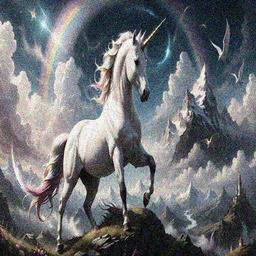

In [19]:
bsp_einhorn_1_dateiname = os.listdir(data_path_einhoerner)[0]
kompletter_pfad_einhorn_1 = os.path.join(data_path_einhoerner, bsp_einhorn_1_dateiname)

bsp_pferd_1_dateiname = os.listdir(data_path_pferde)[0]
kompletter_pfad_pferd_1 = os.path.join(data_path_pferde, bsp_pferd_1_dateiname)

PIL.Image.open(kompletter_pfad_einhorn_1)



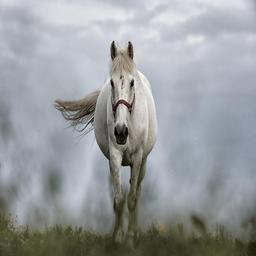

In [20]:
PIL.Image.open(kompletter_pfad_pferd_1)

# Dataset mit Keras erstellen

In [21]:
batch_size = 32
img_height = 256
img_width = 256

In [22]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
  data_path_einhoerner_pferde,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8000 files belonging to 2 classes.
Using 6400 files for training.


In [23]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
  data_path_einhoerner_pferde,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8000 files belonging to 2 classes.
Using 1600 files for validation.


In [24]:
class_names = train_dataset.class_names
print(class_names)

['Einhorn', 'Pferd']


# Bilder anzeigen

2025-02-03 12:58:37.133677: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


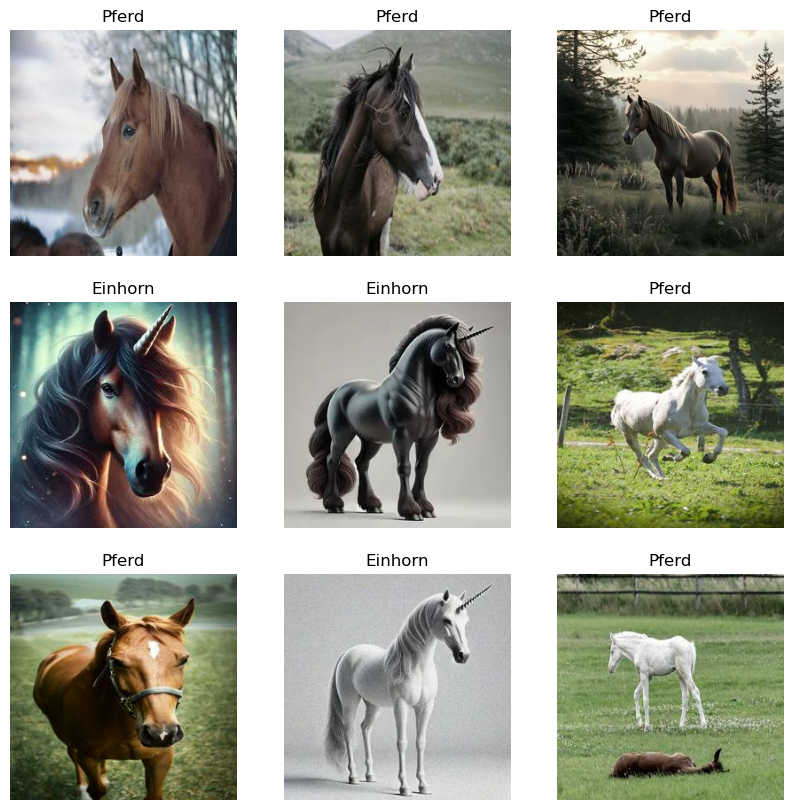

In [25]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Batch shape information

In [27]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


# Performance steigern

In [28]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Standardize the data
### from [0, 255] auf [0,1]

In [31]:
normalization_layer = layers.Rescaling(1./255)

# Create basic model

In [32]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

/Users/peter/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# compile model

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model summary

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,412,578 (32.09 MB)

 Trainable params: 8,412,578 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [35]:
epochs=10
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 53s 254ms/step - accuracy: 0.7328 - loss: 0.7060 - val_accuracy: 0.9325 - val_loss: 0.1735
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 52s 261ms/step - accuracy: 0.9307 - loss: 0.1756 - val_accuracy: 0.9731 - val_loss: 0.0720
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 54s 268ms/step - accuracy: 0.9730 - loss: 0.0771 - val_accuracy: 0.9581 - val_loss: 0.0931
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 51s 254ms/step - accuracy: 0.9850 - loss: 0.0423 - val_accuracy: 0.9850 - val_loss: 0.0402
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 52s 259ms/step - accuracy: 0.9977 - loss: 0.0097 - val_accuracy: 0.9956 - val_loss: 0.0152
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 53s 265ms/step - accuracy: 0.9975 - loss: 0.0102 - val_accuracy: 0.9862 - val_loss: 0.0386
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 51s 257ms/step - accuracy: 0.9866 - loss: 0.0358 - val_accuracy: 0.9819 - val_loss: 0.0472
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 51s 257ms/step - accuracy: 0.9983 - loss: 0

# Visualize training results

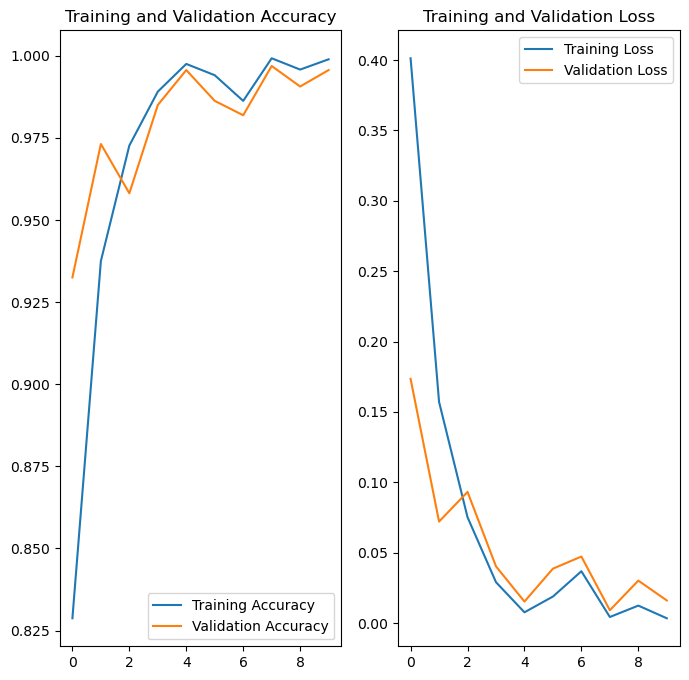

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Overfitting


## Overfitting: Data Augmentation
#### Bereits erledigt (Bilder gespiegelt, Bilder Kontrast geändert, Bilder mit Rauschen versetzt ==> von 500 Bilder pro Klasse auf 4000 Bilder pro Klasse gekommen)

## Overfitting: Dropout

In [41]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

# Compile and train angepasstes model

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,412,578 (32.09 MB)

 Trainable params: 8,412,578 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
epochs = 20
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 54s 267ms/step - accuracy: 0.7278 - loss: 0.7219 - val_accuracy: 0.9325 - val_loss: 0.1701
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 55s 275ms/step - accuracy: 0.9380 - loss: 0.1588 - val_accuracy: 0.9719 - val_loss: 0.0891
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 53s 265ms/step - accuracy: 0.9783 - loss: 0.0661 - val_accuracy: 0.9794 - val_loss: 0.0691
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 49s 245ms/step - accuracy: 0.9841 - loss: 0.0491 - val_accuracy: 0.9588 - val_loss: 0.1259
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 49s 246ms/step - accuracy: 0.9884 - loss: 0.0299 - val_accuracy: 0.9944 - val_loss: 0.0177
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 49s 247ms/step - accuracy: 0.9983 - loss: 0.0066 - val_accuracy: 0.9956 - val_loss: 0.0200
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 49s 245ms/step - accuracy: 0.9929 - loss: 0.0193 - val_accuracy: 0.9950 - val_loss: 0.0139
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 49s 246ms/step - accuracy: 0.9993 - loss: 0

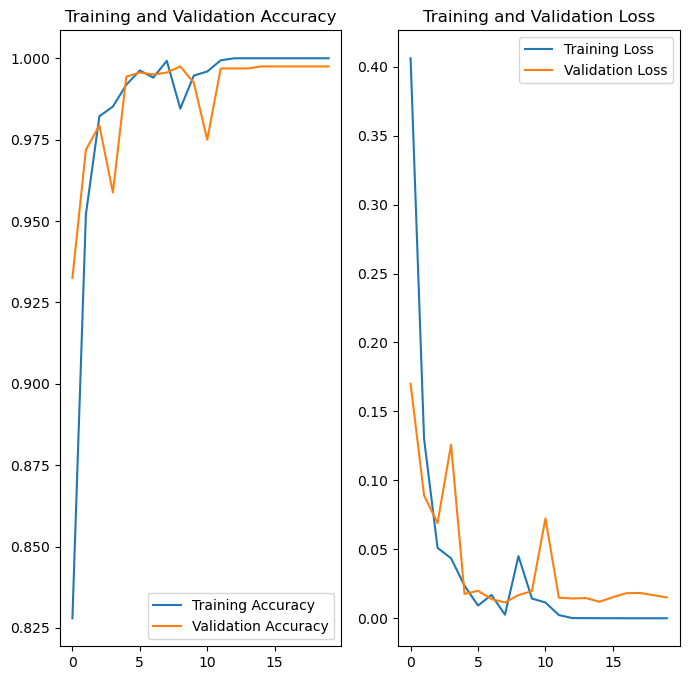

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Predict new data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
This image most likely belongs to Einhorn with a 100.00 percent confidence.
-------------------------------
Es handelt sich um dieses Bild:


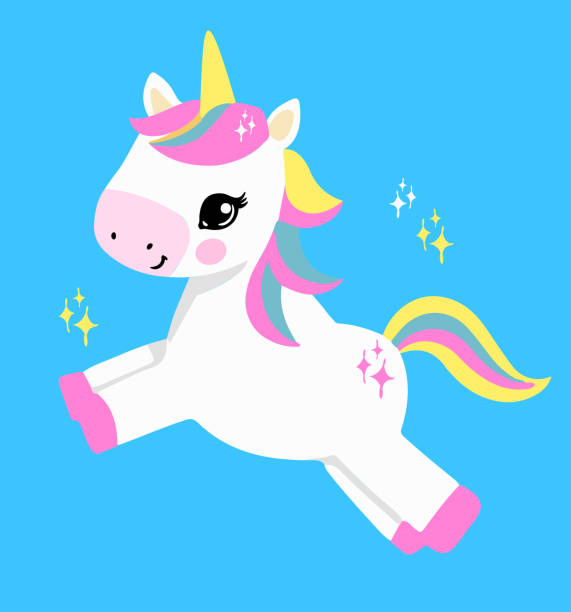

In [50]:

# Lokaler Pfad zum Bild
einhorn_ordner = "/Users/peter/Library/Mobile Documents/com~apple~CloudDocs/Studium Wirtschafts-Informatik Hochschule Aalen/Bachelor of Science/Semester 7/Spezelle Aspekte der Witschaftsinformatik/Projekt/Bilder/Predict"
einhorn_path = os.path.join(einhorn_ordner, "istockphoto-2193425918-612x612.jpg")  # Korrekte Verbindung

# Bild laden & vorbereiten
img = tf.keras.utils.load_img(einhorn_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Erzeugt eine Batch-Dimension

# Vorhersage mit dem Modell
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Ergebnis ausgeben
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


print("-------------------------------")
print("Es handelt sich um dieses Bild:")

PIL.Image.open(einhorn_path)